## NLP with DL

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# RNN de bir nöronun çıkışı diğer nöronun girişi oluyor.(Sıralı bir düzen var)
# NLP genellikle RNN modellerini kullanıyor.
# ANN de bir nöronun çıkışı diğer nöronun girişi olmuyor.

In [2]:
df = pd.read_csv("hepsiburada.csv")
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


### Train Test Split

In [3]:
X = df["Review"].values
y = df["Rating"].values
# Modelimizi Deep Learning modelinde çalıştıracağımız için array e dönüştürdük.
# Not : train_test_split işlemin modele girmeden öncede yapabiliriz. Ayrı ayrı X_train ve X_test e tokenizer.texts_to_sequences uygulamamak için.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

<IPython.core.display.Javascript object>

In [5]:
X_train[251]

'teşekkür ederim memnunum'

In [6]:
y_train[251]

1

### Tokenization

In [7]:
#from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 15000
tokenizer = Tokenizer(num_words=num_words) # filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', bu noktalama ve sayıları datadan çıkarıyor.
# Tokenizer default parametre ayarları ile split yaparak, noktalama isaretleri, stopwords kelimeleri vb. veriden otomatik olarak çıkararak veriyi temizliyor. 
# Word Embedding de CountVectorizer ve TF-IDF deki Lemmatizer vb işlemleri uygulamıyoruz. Çünkü Word Embedding kelimelerin anlamları olduğu gibi alıyor.
# Burada token leri kaça kadar numaralandırmak istiyorsak onu yazdık. Yani en fazla kullanılan 15000 kelimeyi seçiyoruz.

In [8]:
tokenizer.fit_on_texts(X) 
# Yukarıda belirtilen kelime sayısına (15000) fit işlemi uyguluyoruz. 

### Creating Word Index

In [9]:
tokenizer.word_index
# Her bir token e bir sayısal ifade atanıyor. En fazla kullanılandan başlayarak (15000 e kadar 15000 üzerini göz ardı ediyor) numaralandırılıyor.
# Buraki "çok" en fazla kullanılan kelime olduğu için ona bir atandı. Bu sayısal atamalar kelimelerin verideki kullanım sıklığına göre veriliyor.  

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [10]:
len(tokenizer.word_index)
# Bütün tokenlerin sayısı. Ama biz en sık kullanılan 15000 kelimeyi kullanacağız.

217983

### Converting Tokens To Numeric

In [11]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)

In [12]:
X_train[205]

'General Mobile Discovery 16 GB telefonumda kullanmak için aldım. Zaten telefonun kapasitesi oldukça iyi bu yüzden hafıza kartı almayı pek düşünmemiştim. Ama Kingston olunca Class10 olunca ve bu fiyata olunca kaçırmak istemedim. Real Racing,Deer Hunter gibi işlemciyi yoracak birçok oyunu hiç takılma olmadan oynuyorum. Zaten hafıza kartında Kingston kendini kanıtlamış 2-3 marka arasındadır. İhtiyacı olan mutlaka alsın.'

In [13]:
print(X_train_tokens[205])
# Kelimeleri yukarıda oluşturulan sayısal ifadeler ile gösteriyor.

[5731, 5675, 9696, 688, 340, 2944, 322, 8, 17, 75, 333, 1994, 87, 6, 5, 369, 740, 1156, 246, 247, 3242, 12, 2192, 649, 12258, 649, 3, 5, 39, 649, 6632, 2723, 20, 620, 1879, 46, 1542, 672, 4231, 75, 740, 2192, 539, 2763, 26, 52, 137, 2463, 113, 293, 1254]


In [14]:
X_test_tokens = tokenizer.texts_to_sequences(X_test)

### Maximum Number Of Tokens For All Documents

In [15]:
num_tokens = [len(tokens) for tokens in X_train_tokens + X_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens
# Train ve test verilerini birleştirerek herbir yorumdaki token sayısını kontrol ediyoruz.

array([16, 19,  5, ..., 53,  5, 32])

In [16]:
[1,1]+[2,2] # Note

[1, 1, 2, 2]

In [17]:
num_tokens.mean()
# Token sayılarının ortalamasını alıyoruz. Yani yorumlar ortalama 21 kelimeden(token) oluşuyor.

21.36101060793357

In [18]:
num_tokens.max()
# En fazla token(kelime) içeren cümle.

298

### Fixing Token Counts Of All Documents (pad_sequences)

In [19]:
max_tokens = np.array(num_tokens).mean()+2*np.array(num_tokens).std()
max_tokens = int(max_tokens)
max_tokens
# max_tokens i int çevirdik çünkü pad_sequences deki maxlen parametresi int değer alıyor.
# max_tokens sayımızı ortalama + iki standard sapma kadar alamaya karar verdik. Çünkü amacımız eğitim süresini azaltmak o yüzden olabildiğince yorumların anlamını kaybetmeden token sayısını azaltmak.

61

In [20]:
sum(num_tokens < max_tokens)/len(num_tokens)
# Yaklaşık verinin yüzde 96 sının token sayısı 61 (max_tokens) den az. Bunu yapmamızın nedeni matris sayını azaltmak (işlem yükünü azaltmak için). Yani modele sokacağımız yorumlar en fazla 61 tokenden oluşacak.

0.9598968365113328

In [21]:
sum(num_tokens < 50)/len(num_tokens)

0.9331408600516639

In [22]:
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_tokens)
# pad_sequences bütün yorumları maxtokens (61) e göre ayarlıyor (ekleme ve kırpma ile). 

In [23]:
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_tokens)

In [24]:
X_train_pad.shape

(194797, 61)

In [25]:
X_test_pad.shape

(48700, 61)

In [26]:
X_train_tokens[800]

[19,
 77,
 29,
 1070,
 5,
 385,
 236,
 4933,
 560,
 80,
 4,
 37,
 449,
 287,
 165,
 240,
 1110,
 239,
 222,
 164,
 2,
 700,
 4650,
 1595,
 3,
 104,
 11852,
 8296,
 46,
 6476,
 5427,
 1636,
 45,
 1371,
 524,
 12,
 2676,
 61,
 908,
 1103,
 5830,
 2299,
 1266,
 4314,
 1272,
 2,
 271,
 2248,
 1363,
 603,
 601,
 779,
 5898,
 4650,
 7937,
 9162,
 2,
 18,
 856,
 12,
 6220,
 4650,
 74,
 532,
 7937,
 14826,
 22,
 1847,
 5491,
 545,
 358,
 16]

In [27]:
np.array(X_train_tokens[800])

array([   19,    77,    29,  1070,     5,   385,   236,  4933,   560,
          80,     4,    37,   449,   287,   165,   240,  1110,   239,
         222,   164,     2,   700,  4650,  1595,     3,   104, 11852,
        8296,    46,  6476,  5427,  1636,    45,  1371,   524,    12,
        2676,    61,   908,  1103,  5830,  2299,  1266,  4314,  1272,
           2,   271,  2248,  1363,   603,   601,   779,  5898,  4650,
        7937,  9162,     2,    18,   856,    12,  6220,  4650,    74,
         532,  7937, 14826,    22,  1847,  5491,   545,   358,    16])

In [28]:
X_train_pad
# Butun cümleri 61 e tamamladı (ekleme (sıfır ile) ve kırpma ile)
# Ekleme ve kırpmaları yorum cümlelerinin başından başlayarak yapıyor. Yani bütün yorum kelimelerini sondan (61 den) başlayarak dolduruyor eğer cümle 61 kelimeden az ise başta kalan kısımlara sıfır ekleyerek 61 e tamamlıyor. Eğer yorum cümleleri 61 kelimeden fazla ise kelimelerin kullanım sıklığına göre kullanımı az kelimeleri yorumdan cümlelerinden çıkararak 61 e indiriyor.  

array([[   0,    0,    0, ...,  179,   65,  511],
       [   0,    0,    0, ...,    1,   66,   10],
       [   0,    0,    0, ...,   32,   14,    7],
       ...,
       [   0,    0,    0, ..., 2912,   21,   81],
       [   0,    0,    0, ...,   85,  112, 4286],
       [   0,    0,    0, ...,  165,  174,  400]])

### Converting Numeric Tokens To String

In [29]:
index = tokenizer.word_index
inverse = dict(zip(index.values(), index.keys()))
inverse
# Kelimelere atanan sayılar ile kelimeleri yer değiştiriyoruz. Sayılar başta olacak şekilde

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'iyi',
 7: 'güzel',
 8: 'için',
 9: 'tavsiye',
 10: 'ederim',
 11: 'daha',
 12: 'ama',
 13: 'da',
 14: 'gayet',
 15: 'hızlı',
 16: 'teşekkürler',
 17: 'aldım',
 18: 'de',
 19: 'ürünü',
 20: 'gibi',
 21: 'yok',
 22: 'uygun',
 23: 'olarak',
 24: 'kaliteli',
 25: 'en',
 26: '2',
 27: 'kargo',
 28: 'fiyat',
 29: 'elime',
 30: 'kadar',
 31: 'ile',
 32: 'göre',
 33: 'geldi',
 34: 'var',
 35: 'hepsiburada',
 36: 'ben',
 37: 'gerçekten',
 38: '1',
 39: 'fiyata',
 40: 'gün',
 41: 'sonra',
 42: 'cok',
 43: 'kesinlikle',
 44: 'telefon',
 45: 'biraz',
 46: 'hiç',
 47: 'ulaştı',
 48: 'memnun',
 49: 'hem',
 50: 'değil',
 51: 'kullanışlı',
 52: '3',
 53: 'mükemmel',
 54: 'oldu',
 55: 'kullanıyorum',
 56: 'önce',
 57: 'sipariş',
 58: 'tek',
 59: 'her',
 60: 'bence',
 61: 'harika',
 62: 'kalitesi',
 63: 'bi',
 64: 'ayrıca',
 65: '5',
 66: 'teşekkür',
 67: 'fiyatı',
 68: 'olması',
 69: 'ne',
 70: 'herkese',
 71: 'bile',
 72: 'uzun',
 73: 'süper',

In [30]:
def tokens_to_string(tokens):
    words = [inverse[token] for token in tokens if token !=0]
    text = " ".join(words)
    return text

In [31]:
X_train[800]

'Ürünü ilk elime aldığımda bu makine iş görmez dedim. Fakat ürün gerçekten kalitesini belli ediyor. İlk geldiğinde şarjı vardı. Yaklaşık bir aylık sakalı elektrikli ve büyük makinelerin tarzında hiç takılmadan kesti. Ucu biraz dar belki ama işlevi harika. Eksi yönlerine gelecek olursam onlarda boyut ayarlama tarakları dikkatli kullanılmazsa bir işe yaramıyor altı açık olduğundan ana bıçaklar sakalı sıfıra indiriyor. Bir de sıfır ama kafası sakalı tam içine sokmadan sıfıra indirmiyor. Eğerki uygun açıdan alırsa jiletle traş olmuşçasına sıfırlıyor... Hepsiburadaya teşekkürler.'

In [32]:
tokens_to_string(X_train_tokens[800])

'ürünü ilk elime aldığımda bu makine iş görmez dedim fakat ürün gerçekten kalitesini belli ediyor i̇lk geldiğinde şarjı vardı yaklaşık bir aylık sakalı elektrikli ve büyük makinelerin tarzında hiç takılmadan kesti ucu biraz dar belki ama işlevi harika eksi gelecek olursam onlarda boyut ayarlama dikkatli bir işe yaramıyor altı açık olduğundan ana bıçaklar sakalı sıfıra indiriyor bir de sıfır ama kafası sakalı tam içine sıfıra eğerki uygun açıdan jiletle traş hepsiburadaya teşekkürler'

### Modelling

In [33]:
model = Sequential()

In [34]:
embedding_size = 100
# 100 lük vektöre dönüştürüyoruz, genellikle 50, 100, 300 kullanılıyor. Yani 15000 word 100 lük vektörlere dönüştürüldü.
# embedding i kelimelerin birlikte kullanımındaki anlam bütünlüğünü (deyimler vb.) korumak için yapıyoruz. Yani veriyi modelimize 100 grularlar halinde veriyoruz ki anlam bütünlüğü korunsun.
# Not: Modelimizi 100 lük vektör olarak oluşturduğumuz için daha sonra gelecek verilerde 100 boyuta ayarlanmalıdır. 

In [35]:
model.add(Embedding(input_dim = num_words, output_dim = embedding_size, input_length = max_tokens, name = "embedding_layer"))
# num_words = 15 000, max_tokens = 61
# input_dim = num_words toplam kelime sayısı (15000), output_dim = embedding_size (100) , input_length = max_tokens (61)  

In [36]:
# !pip install -U numpy==1.19.5

In [37]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))
# Not: return_sequences=True yapıldığında max_tokens (61) sayısı o GRU hidden layer a da aktarılır. Son GRU layer ı hariç diğerlerinde kullanılması gerekiyor yoksa model hata veriyor ve eğitimi kesiyor.
# Not: LSTM ve GRU da activation olarak "relu" kullanılmıyor, sigmoid ve tanh kullanılıyor.
# GRU içerisindeki activation fonksiyonu tanh, tekrar eden activation fonksiyonu sigmoid dir.
# LSTM ve GRU RNN in geliştirilmiş versiyonları.
# Not : RNN modellerde 5 ten fazla hidden layer kullanımı önerilmiyor. 

In [38]:
optimizer = Adam(learning_rate=0.004)

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])
# Negative yorumlar bizim için önemli olduğu için metrics i Recall kullanıyoruz.
# Modelimiz binary veriden (olumlu, olumsuz) oluştuğu için  loss='binary_crossentropy' kullandık.

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 61, 100)           1500000   
_________________________________________________________________
gru (GRU)                    (None, 61, 48)            21600     
_________________________________________________________________
gru_1 (GRU)                  (None, 61, 24)            5328      
_________________________________________________________________
gru_2 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 1,528,309
Trainable params: 1,528,309
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=5, restore_best_weights=True)
# restore_best_weights=True epoch içerisindeki en iyi val_loss değeri almaya yarıyor. Eğer bunu kullanmazsak en son epoch değerlerini alıyor.

In [42]:
pd.Series(y_train).value_counts(normalize=True)
# Train setindeki yorumların yaklaşık yüzde 94 ü olumlu, yüzde 5 i olumsuz. 

1    0.943834
0    0.056166
dtype: float64

In [43]:
weights = {0:95, 1:5}
# 0 a 95 ve 1 e 5 vererek ağırlıklandırma yapıyoruz.
# Not: 0.95 ve  0.005 yazıldığında model algılamıyor. Yani yüzdeliklerden kurtarmalıyız.

In [44]:
model.fit(X_train_pad, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test_pad, y_test), callbacks=[early_stop])
# Not: Burada X_train_pad (61 e tamamlanmış veriler) kullanıyoruz. 

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/25
761/761 [==============================] - 74s 93ms/step - loss: 3.1723 - recall: 0.8579 - val_loss: 0.2697 - val_recall: 0.8968
Epoch 2/25
761/761 [==============================] - 69s 90ms/step - loss: 1.7087 - recall: 0.9328 - val_loss: 0.1823 - val_recall: 0.9388
Epoch 3/25
761/761 [==============================] - 69s 90ms/step - loss: 1.0786 - recall: 0.9589 - val_loss: 0.2007 - val_recall: 0.9347
Epoch 4/25
761/761 [==============================] - 68s 90ms/step - loss: 0.7874 - recall: 0.9711 - val_loss: 0.1568 - val_recall: 0.9554
Epoch 5/25
761/761 [==============================] - 69s 91ms/step - loss: 0.6334 - recall: 0.9777 - val_loss: 0.2326 - val_recall: 0.9335
Epoch 6/25
761/761 [==============================] - 69s 91ms/step - loss: 0.5378 - recall: 0.9814 - val_loss: 0.1888 - val_recall: 0.9590
Epoch 7/25
761/761 [==

### Model Evaluation

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,3.172294,0.857900,0.269697,0.896835
1,1.708655,0.932795,0.182271,0.938801
2,1.078618,0.958930,0.200745,0.934711
3,0.787399,0.971113,0.156817,0.955357
4,0.633384,0.977743,0.232570,0.933471


<AxesSubplot:>

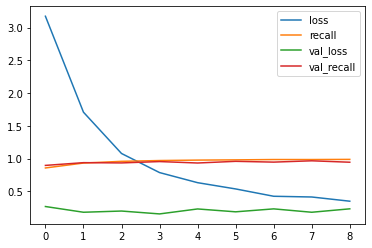

In [46]:
model_loss.plot()

In [47]:
model.evaluate(X_train_pad, np.array(y_train))

6088/6088 [==============================] - 41s 7ms/step - loss: 0.0622 - recall: 0.9788


[0.06218710541725159, 0.9788312315940857]

In [48]:
model.evaluate(X_test_pad, np.array(y_test))

1522/1522 [==============================] - 10s 7ms/step - loss: 0.1568 - recall: 0.9554


[0.15681728720664978, 0.9553573131561279]

In [49]:
y_pred_train = model.predict(x=X_train_pad)
y_pred_train

array([[0.9940947],
       [0.9958228],
       [0.9808112],
       ...,
       [0.9961471],
       [0.9952254],
       [0.0038524]], dtype=float32)

In [50]:
y_pred_tr = np.array([1.0 if p>0.5 else 0.0 for p in y_pred_train])
# RNN de sonuçlar ANN deki gibi 1 ve 0 olarak çıkmadığı için bu değerleri 0 ve 1 e dönüştürüyoruz (0.5 üzerini 1 olarak altını 0 olarak).

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print(confusion_matrix(y_train, y_pred_tr))
print("-------------------------------------------------------")
print(classification_report(y_train, y_pred_tr))

[[ 10779    162]
 [  3892 179964]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     10941
           1       1.00      0.98      0.99    183856

    accuracy                           0.98    194797
   macro avg       0.87      0.98      0.92    194797
weighted avg       0.98      0.98      0.98    194797



In [52]:
y_pred = model.predict(x=X_test_pad)
y_pred.T

array([[0.9954407 , 0.99531245, 0.9912386 , ..., 0.9962853 , 0.9927095 ,
        0.99239993]], dtype=float32)

In [53]:
y_pr = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])
# 0.5 üzerini 1 (olumlu yorum) 0.5 altını 0 (olumsuz yorum) olarak array e dönüştürüyoruz. 

In [54]:
print(confusion_matrix(y_test, y_pr))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pr))

[[ 2094   641]
 [ 2052 43913]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.77      0.61      2735
           1       0.99      0.96      0.97     45965

    accuracy                           0.94     48700
   macro avg       0.75      0.86      0.79     48700
weighted avg       0.96      0.94      0.95     48700



### Prediction

In [55]:
incorrect = np.where(y_test != y_pr)
incorrect 

(array([   38,    49,    52, ..., 48625, 48678, 48688], dtype=int64),)

In [56]:
len(incorrect)

1

In [57]:
len(incorrect[0])

2693

In [58]:
idx = incorrect[0][0]
idx

38

In [59]:
text = X_test[idx]
text

'işe yarayan bir ürün buldum sonunda'

In [60]:
y_pred[idx]

array([0.08432373], dtype=float32)

In [61]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "kargo süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürünü siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11]

In [62]:
tokens = tokenizer.texts_to_sequences(reviews)
# texts_to_sequences kelimeleri sayılara dönüştürülüyor

In [63]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape
# pad_sequences yorumların boyutlarını 61 e göre düzenliyor.


(11, 61)

In [64]:
model.predict(tokens_pad)
# predict ise bu tokenleri 100 vektörlere dönüştürerek tahmin yapıyor.

array([[0.9884945 ],
       [0.72140586],
       [0.00334778],
       [0.96627903],
       [0.01891571],
       [0.0075511 ],
       [0.49893713],
       [0.9833666 ],
       [0.98572665],
       [0.02032131],
       [0.99167967]], dtype=float32)